In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import arabic_reshaper
from bidi.algorithm import get_display
import os

<div class="note" style="
background-color: #FFF2CC;  /* Ÿæÿ≥‚Äåÿ≤ŸÖ€åŸÜŸá ÿ≤ÿ±ÿØ ŸÖŸÑÿß€åŸÖ */
border-left: 4px solid #E69F00;  /* ÿ≠ÿßÿ¥€åŸá ŸÜÿßÿ±ŸÜÿ¨€å */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>1) ÿ®ÿßÿ±⁄Øÿ≤ÿßÿ±€å ÿØÿßÿØŸá Ÿáÿß€å ÿÆÿßŸÖ</h1>

In [22]:
input_file_path = 'orders.csv'  # ŸÅÿß€åŸÑ ÿØÿßÿØŸá ÿÆÿßŸÖ
output_file_path = 'order_cleaned.csv'  # ŸÅÿß€åŸÑ ÿØÿßÿØŸá ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá

df = pd.read_csv(input_file_path)

# ŸÜŸÖÿß€åÿ¥ ÿßÿ∑ŸÑÿßÿπÿßÿ™ ÿßŸàŸÑ€åŸá ÿØÿ±ÿ®ÿßÿ±Ÿá ÿØÿßÿØŸá‚ÄåŸáÿß
print("\n ÿßÿ∑ŸÑÿßÿπÿßÿ™ ⁄©ŸÑ€å:")
print(df.info())

# ŸÜŸÖÿß€åÿ¥ €µ ÿ±ÿØ€åŸÅ ÿßŸàŸÑ ÿØÿßÿØŸá‚ÄåŸáÿß
print("\n ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß:")
display(df.head())

# ÿ¢ŸÖÿßÿ± ÿ™Ÿàÿµ€åŸÅ€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿπÿØÿØ€å
print("\n ÿ¢ŸÖÿßÿ± ÿ™Ÿàÿµ€åŸÅ€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿπÿØÿØ€å:")
display(df.describe())


 ÿßÿ∑ŸÑÿßÿπÿßÿ™ ⁄©ŸÑ€å:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Item                200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB
None

 ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß:


ID_Order  ID_Customer  ID_Item    DateTime_CartFinalize  \
0   2714054       469662    21386  2015-10-15 08:50:56.000   
1  11104039      3063877   248497  2018-02-11 00:29:26.000   
2   4228130      3184893    50144  2016-06-14 00:30:08.000   
3  22225624      6888562    70208  2018-09-03 14:37:19.000   
4   4068771      2533490    67627  2016-05-21 11:51:02.000   

   Amount_Gross_Order city_name_fa  Quantity_item  
0            597982.0   ŸÖÿ≠ŸÖŸàÿØ ÿ¢ÿ®ÿßÿØ            1.0  
1            980000.0       ÿÆÿ±ŸÖÿØÿ±Ÿá            1.0  
2            229358.0         ŸÇÿ±⁄Ü⁄©            1.0  
3             16514.0           ŸÇŸÖ            1.0  
4            133028.0        ÿ™Ÿáÿ±ÿßŸÜ            1.0


 ÿ¢ŸÖÿßÿ± ÿ™Ÿàÿµ€åŸÅ€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿπÿØÿØ€å:


ID_Order   ID_Customer       ID_Item  Amount_Gross_Order  \
count  2.000000e+05  2.000000e+05  2.000000e+05        2.000000e+05   
mean   9.871963e+06  2.860671e+06  3.757313e+05        1.458204e+06   
std    6.404275e+06  1.921815e+06  3.948462e+05        5.450972e+06   
min    1.000411e+06  4.661320e+05  7.600000e+01        0.000000e+00   
25%    5.022253e+06  1.021053e+06  8.955725e+04        1.212730e+05   
50%    8.591270e+06  2.895180e+06  2.302210e+05        3.211010e+05   
75%    1.246037e+07  4.179218e+06  5.192668e+05        1.011032e+06   
max    2.484656e+07  7.282118e+06  2.093722e+06        1.530000e+09   

       Quantity_item  
count  200000.000000  
mean        1.261225  
std         1.801186  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max       500.000000

<div class="note" style="
background-color: #FFF2CC;  /* Ÿæÿ≥‚Äåÿ≤ŸÖ€åŸÜŸá ÿ≤ÿ±ÿØ ŸÖŸÑÿß€åŸÖ */
border-left: 4px solid #E69F00;  /* ÿ≠ÿßÿ¥€åŸá ŸÜÿßÿ±ŸÜÿ¨€å */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>2) ÿßÿ±ÿ≤€åÿßÿ®€å ⁄©€åŸÅ€åÿ™ ÿØÿßÿØŸá Ÿáÿß</h1>

In [23]:
# ÿ®ÿ±ÿ±ÿ≥€å ŸÖŸÇÿßÿØ€åÿ± ⁄ØŸÖÿ¥ÿØŸá ÿØÿ± Ÿáÿ± ÿ≥ÿ™ŸàŸÜ
print(" ÿ®ÿ±ÿ±ÿ≥€å ŸÖŸÇÿßÿØ€åÿ± ⁄ØŸÖÿ¥ÿØŸá (NaN):")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'ŸÖŸÇÿØÿßÿ± ⁄ØŸÖÿ¥ÿØŸá': missing_values,
    'ÿØÿ±ÿµÿØ ⁄ØŸÖÿ¥ÿØŸá': missing_percentage.round(2)
})
display(missing_info)

# ÿ®ÿ±ÿ±ÿ≥€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å
print(f" ÿ™ÿπÿØÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å ⁄©ÿßŸÖŸÑ: {df.duplicated().sum()}")
print(f"ÿ™ÿπÿØÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ID_Order: {df['ID_Order'].duplicated().sum()}")

# ÿ®ÿ±ÿ±ÿ≥€å ŸÜÿßÿ≥ÿßÿ≤⁄Øÿßÿ±€å‚ÄåŸáÿß ÿØÿ± ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿπÿØÿØ€å
print("\n ÿ®ÿ±ÿ±ÿ≥€å ŸÜÿßÿ≥ÿßÿ≤⁄Øÿßÿ±€å‚ÄåŸáÿß€å ÿØÿßÿØŸá:")

# ÿ®ÿ±ÿ±ÿ≥€å ŸÖŸÇÿßÿØ€åÿ± ŸÖŸÜŸÅ€å ÿØÿ± Quantity_item
negative_quantity = df[df['Quantity_item'] < 0]
print(f"ÿ™ÿπÿØÿßÿØ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ÿ®ÿß Quantity_item ŸÖŸÜŸÅ€å: {len(negative_quantity)}")

# ÿ®ÿ±ÿ±ÿ≥€å ŸÖŸÇÿßÿØ€åÿ± ŸÖŸÜŸÅ€å ÿØÿ± Amount_Gross_Order
negative_amount = df[df['Amount_Gross_Order'] < 0]
print(f"ÿ™ÿπÿØÿßÿØ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ÿ®ÿß Amount_Gross_Order ŸÖŸÜŸÅ€å: {len(negative_amount)}")

# ÿ®ÿ±ÿ±ÿ≥€å ŸÖŸÇÿßÿØ€åÿ± ÿµŸÅÿ± ÿØÿ± Quantity_item
zero_quantity = df[df['Quantity_item'] == 0]
print(f"ÿ™ÿπÿØÿßÿØ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ÿ®ÿß Quantity_item ÿµŸÅÿ±: {len(zero_quantity)}")

 ÿ®ÿ±ÿ±ÿ≥€å ŸÖŸÇÿßÿØ€åÿ± ⁄ØŸÖÿ¥ÿØŸá (NaN):


ŸÖŸÇÿØÿßÿ± ⁄ØŸÖÿ¥ÿØŸá  ÿØÿ±ÿµÿØ ⁄ØŸÖÿ¥ÿØŸá
ID_Order                         0         0.0
ID_Customer                      0         0.0
ID_Item                          0         0.0
DateTime_CartFinalize            0         0.0
Amount_Gross_Order               0         0.0
city_name_fa                     0         0.0
Quantity_item                    0         0.0

 ÿ™ÿπÿØÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å ⁄©ÿßŸÖŸÑ: 0
ÿ™ÿπÿØÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ID_Order: 2369

 ÿ®ÿ±ÿ±ÿ≥€å ŸÜÿßÿ≥ÿßÿ≤⁄Øÿßÿ±€å‚ÄåŸáÿß€å ÿØÿßÿØŸá:
ÿ™ÿπÿØÿßÿØ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ÿ®ÿß Quantity_item ŸÖŸÜŸÅ€å: 0
ÿ™ÿπÿØÿßÿØ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ÿ®ÿß Amount_Gross_Order ŸÖŸÜŸÅ€å: 0
ÿ™ÿπÿØÿßÿØ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ÿ®ÿß Quantity_item ÿµŸÅÿ±: 0


<div class="note" style="
background-color: #FFF2CC;  /* Ÿæÿ≥‚Äåÿ≤ŸÖ€åŸÜŸá ÿ≤ÿ±ÿØ ŸÖŸÑÿß€åŸÖ */
border-left: 4px solid #E69F00;  /* ÿ≠ÿßÿ¥€åŸá ŸÜÿßÿ±ŸÜÿ¨€å */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>3) Ÿæÿß⁄© ÿ≥ÿßÿ≤€å ÿØÿßÿØŸá Ÿáÿß</h1>

In [24]:

# ÿß€åÿ¨ÿßÿØ €å⁄© ⁄©Ÿæ€å ÿßÿ≤ DataFrame ÿ®ÿ±ÿß€å Ÿæÿß⁄©‚Äåÿ≥ÿßÿ≤€å
df_clean = df.copy()
print(f" ÿß€åÿ¨ÿßÿØ ⁄©Ÿæ€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ±ÿß€å Ÿæÿß⁄©‚Äåÿ≥ÿßÿ≤€å. ÿßÿ®ÿπÿßÿØ: {df_clean.shape}")

# ŸÖÿØ€åÿ±€åÿ™ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å - ÿ≠ÿ∞ŸÅ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ⁄©ÿßŸÖŸÑÿßŸã ÿ™⁄©ÿ±ÿßÿ±€å
initial_count = len(df_clean)
df_clean = df_clean.drop_duplicates()
removed_duplicates = initial_count - len(df_clean)
print(f" ÿ≠ÿ∞ŸÅ {removed_duplicates} ÿ±⁄©Ÿàÿ±ÿØ ÿ™⁄©ÿ±ÿßÿ±€å ⁄©ÿßŸÖŸÑ")

# ŸÖÿØ€åÿ±€åÿ™ ŸÖŸÇÿßÿØ€åÿ± ŸÖŸÜŸÅ€å - ÿ™ÿ®ÿØ€åŸÑ ÿ®Ÿá ŸÖŸÇÿßÿØ€åÿ± ŸÖÿ´ÿ®ÿ™ (ÿ®ÿß ŸÅÿ±ÿ∂ ÿÆÿ∑ÿß€å ÿ´ÿ®ÿ™)
if len(negative_quantity) > 0:
    df_clean['Quantity_item'] = df_clean['Quantity_item'].abs()
    print(" ŸÖŸÇÿßÿØ€åÿ± ŸÖŸÜŸÅ€å Quantity_item ÿ®Ÿá ŸÖÿ´ÿ®ÿ™ ÿ™ÿ®ÿØ€åŸÑ ÿ¥ÿØŸÜÿØ")

if len(negative_amount) > 0:
    df_clean['Amount_Gross_Order'] = df_clean['Amount_Gross_Order'].abs()
    print(" ŸÖŸÇÿßÿØ€åÿ± ŸÖŸÜŸÅ€å Amount_Gross_Order ÿ®Ÿá ŸÖÿ´ÿ®ÿ™ ÿ™ÿ®ÿØ€åŸÑ ÿ¥ÿØŸÜÿØ")

# ÿ≠ÿ∞ŸÅ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ÿ®ÿß Quantity_item ÿµŸÅÿ± (ÿß⁄Øÿ± Ÿàÿ¨ŸàÿØ ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥ÿØ)
if len(zero_quantity) > 0:
    df_clean = df_clean[df_clean['Quantity_item'] > 0]
    print(f" ÿ≠ÿ∞ŸÅ {len(zero_quantity)} ÿ±⁄©Ÿàÿ±ÿØ ÿ®ÿß Quantity_item ÿµŸÅÿ±")

# ŸÖÿØ€åÿ±€åÿ™ ŸÖŸÇÿßÿØ€åÿ± ⁄ØŸÖÿ¥ÿØŸá - ŸÜŸÖÿß€åÿ¥ Ÿàÿ∂ÿπ€åÿ™ ŸÅÿπŸÑ€å
print("\n Ÿàÿ∂ÿπ€åÿ™ ŸÖŸÇÿßÿØ€åÿ± ⁄ØŸÖÿ¥ÿØŸá Ÿæÿ≥ ÿßÿ≤ Ÿæÿß⁄©‚Äåÿ≥ÿßÿ≤€å ÿßŸàŸÑ€åŸá:")
missing_after_clean = df_clean.isnull().sum()
display(missing_after_clean[missing_after_clean > 0])

 ÿß€åÿ¨ÿßÿØ ⁄©Ÿæ€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ±ÿß€å Ÿæÿß⁄©‚Äåÿ≥ÿßÿ≤€å. ÿßÿ®ÿπÿßÿØ: (200000, 7)
 ÿ≠ÿ∞ŸÅ 0 ÿ±⁄©Ÿàÿ±ÿØ ÿ™⁄©ÿ±ÿßÿ±€å ⁄©ÿßŸÖŸÑ

 Ÿàÿ∂ÿπ€åÿ™ ŸÖŸÇÿßÿØ€åÿ± ⁄ØŸÖÿ¥ÿØŸá Ÿæÿ≥ ÿßÿ≤ Ÿæÿß⁄©‚Äåÿ≥ÿßÿ≤€å ÿßŸàŸÑ€åŸá:


Series([], dtype: int64)

<div class="note" style="
background-color: #FFF2CC;  /* Ÿæÿ≥‚Äåÿ≤ŸÖ€åŸÜŸá ÿ≤ÿ±ÿØ ŸÖŸÑÿß€åŸÖ */
border-left: 4px solid #E69F00;  /* ÿ≠ÿßÿ¥€åŸá ŸÜÿßÿ±ŸÜÿ¨€å */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>4) ÿ™ÿ®ÿØ€åŸÑ ÿØÿßÿØŸá Ÿáÿß</h1>

In [25]:
# ÿ™ÿ®ÿØ€åŸÑ DateTime_CartFinalize ÿ®Ÿá ŸÜŸàÿπ datetime
print(" ÿ™ÿ®ÿØ€åŸÑ DateTime_CartFinalize ÿ®Ÿá ŸÅÿ±ŸÖÿ™ ÿ™ÿßÿ±€åÿÆ-ÿ≤ŸÖÿßŸÜ...")
try:
    df_clean['DateTime_CartFinalize'] = pd.to_datetime(df_clean['DateTime_CartFinalize'])
    print(" ÿ™ÿ®ÿØ€åŸÑ ÿ®ÿß ŸÖŸàŸÅŸÇ€åÿ™ ÿßŸÜÿ¨ÿßŸÖ ÿ¥ÿØ")
    # ŸÜŸÖÿß€åÿ¥ ŸÖÿ≠ÿØŸàÿØŸá ÿ™ÿßÿ±€åÿÆ€å ÿØÿßÿØŸá‚ÄåŸáÿß
    print(f"\n ŸÖÿ≠ÿØŸàÿØŸá ÿ™ÿßÿ±€åÿÆ€å ÿØÿßÿØŸá‚ÄåŸáÿß:")
    print(f"ŸÇÿØ€åŸÖ€å‚Äåÿ™ÿ±€åŸÜ ÿ™ÿßÿ±€åÿÆ: {df_clean['DateTime_CartFinalize'].min()}")
    print(f"ÿ¨ÿØ€åÿØÿ™ÿ±€åŸÜ ÿ™ÿßÿ±€åÿÆ: {df_clean['DateTime_CartFinalize'].max()}")
    
except Exception as e:
    print(f" ÿÆÿ∑ÿß ÿØÿ± ÿ™ÿ®ÿØ€åŸÑ ÿ™ÿßÿ±€åÿÆ: {e}")

# ÿ™ÿ®ÿØ€åŸÑ ÿØÿßÿØŸá Ÿáÿß€å ÿ¥Ÿáÿ± ÿ®Ÿá str
# ÿß€åÿ¨ÿßÿØ €å⁄© ⁄©Ÿæ€å ÿßÿ≤ ÿ≥ÿ™ŸàŸÜ ÿßÿµŸÑ€å ÿ®ÿ±ÿß€å ÿßÿ∑ŸÖ€åŸÜÿßŸÜ
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa'].copy()

# 1. ÿ≠ÿ∞ŸÅ ŸÅÿ∂ÿßŸáÿß€å ÿßÿ∂ÿßŸÅŸá ÿØÿ± ÿßÿ®ÿ™ÿØÿß Ÿà ÿßŸÜÿ™Ÿáÿß
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].str.strip()

# 2. ÿ™ÿ®ÿØ€åŸÑ ÿ®Ÿá ÿ≠ÿ±ŸàŸÅ ŸÅÿßÿ±ÿ≥€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØ (ÿ¨ÿßŸàÿßŸáÿß€å€å ⁄©Ÿá ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ÿßÿ¥ÿ™ÿ®ÿßŸá ÿ®ÿßÿ¥ŸÜÿØ)
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].str.replace('Ÿä', '€å')  # ÿ™ÿ®ÿØ€åŸÑ €å ÿπÿ±ÿ®€å ÿ®Ÿá ŸÅÿßÿ±ÿ≥€å
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].str.replace('ŸÉ', '⁄©')  # ÿ™ÿ®ÿØ€åŸÑ ⁄© ÿπÿ±ÿ®€å ÿ®Ÿá ŸÅÿßÿ±ÿ≥€å

# 3. ÿ≠ÿ∞ŸÅ ÿßÿπÿØÿßÿØ Ÿà ⁄©ÿßÿ±ÿß⁄©ÿ™ÿ±Ÿáÿß€å ÿ∫€åÿ±ŸÖÿ¨ÿßÿ≤
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].str.replace(r'[0-9]', '', regex=True)
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].str.replace(r'[^\w\s]', '', regex=True)

# 4. ÿ™ÿ®ÿØ€åŸÑ ÿ®Ÿá ÿ≠ÿ±ŸàŸÅ ⁄©Ÿà⁄Ü⁄© ÿ®ÿ±ÿß€å €å⁄©ÿ≥ÿßŸÜ‚Äåÿ≥ÿßÿ≤€å (ÿßÿÆÿ™€åÿßÿ±€å)
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].str.lower()

# 5. ÿ¨ÿß€å⁄Øÿ≤€åŸÜ€å ŸÖŸÇÿßÿØ€åÿ± ÿÆÿßŸÑ€å ÿ®ÿß NaN
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].replace(['', ' ', 'nan', 'NaN', 'None'], pd.NA)

# ÿ®ÿ±ÿ±ÿ≥€å ŸÜŸáÿß€å€å ÿßŸÜŸàÿßÿπ ÿØÿßÿØŸá‚ÄåŸáÿß
print("\n ÿßŸÜŸàÿßÿπ ÿØÿßÿØŸá‚ÄåŸáÿß Ÿæÿ≥ ÿßÿ≤ ÿ™ÿ®ÿØ€åŸÑ:")
print(df_clean.dtypes)

 ÿ™ÿ®ÿØ€åŸÑ DateTime_CartFinalize ÿ®Ÿá ŸÅÿ±ŸÖÿ™ ÿ™ÿßÿ±€åÿÆ-ÿ≤ŸÖÿßŸÜ...
 ÿ™ÿ®ÿØ€åŸÑ ÿ®ÿß ŸÖŸàŸÅŸÇ€åÿ™ ÿßŸÜÿ¨ÿßŸÖ ÿ¥ÿØ

 ŸÖÿ≠ÿØŸàÿØŸá ÿ™ÿßÿ±€åÿÆ€å ÿØÿßÿØŸá‚ÄåŸáÿß:
ŸÇÿØ€åŸÖ€å‚Äåÿ™ÿ±€åŸÜ ÿ™ÿßÿ±€åÿÆ: 2013-09-27 12:03:00
ÿ¨ÿØ€åÿØÿ™ÿ±€åŸÜ ÿ™ÿßÿ±€åÿÆ: 2018-12-11 04:47:23

 ÿßŸÜŸàÿßÿπ ÿØÿßÿØŸá‚ÄåŸáÿß Ÿæÿ≥ ÿßÿ≤ ÿ™ÿ®ÿØ€åŸÑ:
ID_Order                          int64
ID_Customer                       int64
ID_Item                           int64
DateTime_CartFinalize    datetime64[ns]
Amount_Gross_Order              float64
city_name_fa                     object
Quantity_item                   float64
city_name_fa_cleaned             object
dtype: object


<div class="note" style="
background-color: #FFF2CC;  /* Ÿæÿ≥‚Äåÿ≤ŸÖ€åŸÜŸá ÿ≤ÿ±ÿØ ŸÖŸÑÿß€åŸÖ */
border-left: 4px solid #E69F00;  /* ÿ≠ÿßÿ¥€åŸá ŸÜÿßÿ±ŸÜÿ¨€å */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>5) ÿ∞ÿÆ€åÿ±Ÿá ÿ≥ÿßÿ≤€å ÿØÿßÿØŸá Ÿáÿß€å ÿ™ŸÖ€åÿ≤</h1>

In [26]:
# ÿ∞ÿÆ€åÿ±Ÿá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá
print(" ÿØÿ± ÿ≠ÿßŸÑ ÿ∞ÿÆ€åÿ±Ÿá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá...")

if not os.path.exists(output_file_path):
    df_clean.to_csv(output_file_path, index=False, encoding='utf-8-sig')
    print(f" ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá ÿ®ÿß ŸÖŸàŸÅŸÇ€åÿ™ ÿØÿ± {output_file_path} ÿ∞ÿÆ€åÿ±Ÿá ÿ¥ÿØŸÜÿØ")
    print(f" ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá ŸÜŸáÿß€å€å: {df_clean.shape}")
else:
    print(f" ŸÅÿß€åŸÑ {output_file_path} ÿßÿ≤ ŸÇÿ®ŸÑ Ÿàÿ¨ŸàÿØ ÿØÿßÿ±ÿØ.")
    print("ÿ®ÿ±ÿß€å ÿ¨ŸÑŸà⁄Ø€åÿ±€å ÿßÿ≤ ÿ±ÿßŸÜŸà€åÿ≥€åÿå ÿ∞ÿÆ€åÿ±Ÿá‚Äåÿ≥ÿßÿ≤€å ÿßŸÜÿ¨ÿßŸÖ ŸÜÿ¥ÿØ.")
    print("ÿß⁄Øÿ± ŸÖ€å‚ÄåÿÆŸàÿßŸá€åÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ±ÿß ŸÖÿ¨ÿØÿØÿßŸã ÿ∞ÿÆ€åÿ±Ÿá ⁄©ŸÜ€åÿØÿå ŸÑÿ∑ŸÅÿßŸã ŸÅÿß€åŸÑ ŸÖŸàÿ¨ŸàÿØ ÿ±ÿß ÿ≠ÿ∞ŸÅ ⁄©ŸÜ€åÿØ.")

# ŸÜŸÖÿß€åÿ¥ ÿÆŸÑÿßÿµŸá‚Äåÿß€å ÿßÿ≤ ÿ™ÿ∫€å€åÿ±ÿßÿ™
print("\n" + "="*50)
print(" ÿÆŸÑÿßÿµŸá‚Äåÿß€å ÿßÿ≤ ÿ™ÿ∫€å€åÿ±ÿßÿ™ ÿßÿπŸÖÿßŸÑ ÿ¥ÿØŸá:")
print(f"ÿ™ÿπÿØÿßÿØ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ÿßŸàŸÑ€åŸá: {len(df)}")
print(f"ÿ™ÿπÿØÿßÿØ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ŸÜŸáÿß€å€å: {len(df_clean)}")
print(f"ÿ™ÿπÿØÿßÿØ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸá: {len(df) - len(df_clean)}")
print(f"ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß: {list(df_clean.columns)}")
print("="*50)

# ŸÜŸÖÿß€åÿ¥ ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá
print("\n ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá:")
display(df_clean.head())

# ÿ®ÿ±ÿ±ÿ≥€å ŸÜŸáÿß€å€å Ÿàÿ∂ÿπ€åÿ™ ÿØÿßÿØŸá‚ÄåŸáÿß
print("\n ÿ®ÿ±ÿ±ÿ≥€å ŸÜŸáÿß€å€å Ÿàÿ∂ÿπ€åÿ™ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá:")
print(df_clean.info())

 ÿØÿ± ÿ≠ÿßŸÑ ÿ∞ÿÆ€åÿ±Ÿá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá...
 ŸÅÿß€åŸÑ order_cleaned.csv ÿßÿ≤ ŸÇÿ®ŸÑ Ÿàÿ¨ŸàÿØ ÿØÿßÿ±ÿØ.
ÿ®ÿ±ÿß€å ÿ¨ŸÑŸà⁄Ø€åÿ±€å ÿßÿ≤ ÿ±ÿßŸÜŸà€åÿ≥€åÿå ÿ∞ÿÆ€åÿ±Ÿá‚Äåÿ≥ÿßÿ≤€å ÿßŸÜÿ¨ÿßŸÖ ŸÜÿ¥ÿØ.
ÿß⁄Øÿ± ŸÖ€å‚ÄåÿÆŸàÿßŸá€åÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ±ÿß ŸÖÿ¨ÿØÿØÿßŸã ÿ∞ÿÆ€åÿ±Ÿá ⁄©ŸÜ€åÿØÿå ŸÑÿ∑ŸÅÿßŸã ŸÅÿß€åŸÑ ŸÖŸàÿ¨ŸàÿØ ÿ±ÿß ÿ≠ÿ∞ŸÅ ⁄©ŸÜ€åÿØ.

 ÿÆŸÑÿßÿµŸá‚Äåÿß€å ÿßÿ≤ ÿ™ÿ∫€å€åÿ±ÿßÿ™ ÿßÿπŸÖÿßŸÑ ÿ¥ÿØŸá:
ÿ™ÿπÿØÿßÿØ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ÿßŸàŸÑ€åŸá: 200000
ÿ™ÿπÿØÿßÿØ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ŸÜŸáÿß€å€å: 200000
ÿ™ÿπÿØÿßÿØ ÿ±⁄©Ÿàÿ±ÿØŸáÿß€å ÿ≠ÿ∞ŸÅ ÿ¥ÿØŸá: 0
ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß: ['ID_Order', 'ID_Customer', 'ID_Item', 'DateTime_CartFinalize', 'Amount_Gross_Order', 'city_name_fa', 'Quantity_item', 'city_name_fa_cleaned']

 ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá:


ID_Order  ID_Customer  ID_Item DateTime_CartFinalize  Amount_Gross_Order  \
0   2714054       469662    21386   2015-10-15 08:50:56            597982.0   
1  11104039      3063877   248497   2018-02-11 00:29:26            980000.0   
2   4228130      3184893    50144   2016-06-14 00:30:08            229358.0   
3  22225624      6888562    70208   2018-09-03 14:37:19             16514.0   
4   4068771      2533490    67627   2016-05-21 11:51:02            133028.0   

  city_name_fa  Quantity_item city_name_fa_cleaned  
0   ŸÖÿ≠ŸÖŸàÿØ ÿ¢ÿ®ÿßÿØ            1.0           ŸÖÿ≠ŸÖŸàÿØ ÿ¢ÿ®ÿßÿØ  
1       ÿÆÿ±ŸÖÿØÿ±Ÿá            1.0               ÿÆÿ±ŸÖÿØÿ±Ÿá  
2         ŸÇÿ±⁄Ü⁄©            1.0                 ŸÇÿ±⁄Ü⁄©  
3           ŸÇŸÖ            1.0                   ŸÇŸÖ  
4        ÿ™Ÿáÿ±ÿßŸÜ            1.0                ÿ™Ÿáÿ±ÿßŸÜ


 ÿ®ÿ±ÿ±ÿ≥€å ŸÜŸáÿß€å€å Ÿàÿ∂ÿπ€åÿ™ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID_Order               200000 non-null  int64         
 1   ID_Customer            200000 non-null  int64         
 2   ID_Item                200000 non-null  int64         
 3   DateTime_CartFinalize  200000 non-null  datetime64[ns]
 4   Amount_Gross_Order     200000 non-null  float64       
 5   city_name_fa           200000 non-null  object        
 6   Quantity_item          200000 non-null  float64       
 7   city_name_fa_cleaned   200000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 12.2+ MB
None


<div class="note" style="
background-color: #FFF2CC;  /* Ÿæÿ≥‚Äåÿ≤ŸÖ€åŸÜŸá ÿ≤ÿ±ÿØ ŸÖŸÑÿß€åŸÖ */
border-left: 4px solid #E69F00;  /* ÿ≠ÿßÿ¥€åŸá ŸÜÿßÿ±ŸÜÿ¨€å */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>6) ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ Ÿà€å⁄ò⁄Ø€å Ÿáÿß€å ÿ≤ŸÖÿßŸÜ€å </h1>

In [27]:
# ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá
print(" ÿØÿ± ÿ≠ÿßŸÑ ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá...")
try:
    df = pd.read_csv('order_cleaned.csv')
    print(f" ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá ÿ®ÿß ŸÖŸàŸÅŸÇ€åÿ™ ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿ¥ÿØŸÜÿØ. ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá: {df.shape}")
except FileNotFoundError:
    print(" ŸÅÿß€åŸÑ order_cleaned.csv €åÿßŸÅÿ™ ŸÜÿ¥ÿØ. ŸÑÿ∑ŸÅÿßŸã ÿßÿ®ÿ™ÿØÿß ŸÜŸàÿ™‚Äåÿ®Ÿà⁄© 01-Data_Cleaning ÿ±ÿß ÿßÿ¨ÿ±ÿß ⁄©ŸÜ€åÿØ.")
    raise

# ÿ™ÿ®ÿØ€åŸÑ ÿ™ÿßÿ±€åÿÆ ÿ®Ÿá datetime
df['DateTime_CartFinalize'] = pd.to_datetime(df['DateTime_CartFinalize'])

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß€å ÿ≤ŸÖÿßŸÜ€å

df['year'] = df['DateTime_CartFinalize'].dt.year
df['month'] = df['DateTime_CartFinalize'].dt.month
df['month_name'] = df['DateTime_CartFinalize'].dt.month_name()
df['day'] = df['DateTime_CartFinalize'].dt.day
df['day_name'] = df['DateTime_CartFinalize'].dt.day_name()
df['hour'] = df['DateTime_CartFinalize'].dt.hour
df['date'] = df['DateTime_CartFinalize'].dt.date

# ŸÜŸÖÿß€åÿ¥ ÿßÿ∑ŸÑÿßÿπÿßÿ™ ÿßŸàŸÑ€åŸá
print(" ÿßÿ∑ŸÑÿßÿπÿßÿ™ ⁄©ŸÑ€å ÿØÿßÿØŸá‚ÄåŸáÿß:")
print(f"ÿ®ÿßÿ≤Ÿá ÿ≤ŸÖÿßŸÜ€å ÿØÿßÿØŸá‚ÄåŸáÿß: ÿßÿ≤ {df['DateTime_CartFinalize'].min()} ÿ™ÿß {df['DateTime_CartFinalize'].max()}")
print(f"ÿ™ÿπÿØÿßÿØ ÿ≥ÿßŸÑ‚ÄåŸáÿß€å ŸÖŸàÿ¨ŸàÿØ: {df['year'].nunique()}")
print(f"ÿ™ÿπÿØÿßÿØ ŸÖÿßŸá‚ÄåŸáÿß€å ŸÖŸàÿ¨ŸàÿØ: {df['month'].nunique()}")


 ÿØÿ± ÿ≠ÿßŸÑ ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá...
 ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ŸÖ€åÿ≤ ÿ¥ÿØŸá ÿ®ÿß ŸÖŸàŸÅŸÇ€åÿ™ ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿ¥ÿØŸÜÿØ. ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá: (200000, 8)
 ÿßÿ∑ŸÑÿßÿπÿßÿ™ ⁄©ŸÑ€å ÿØÿßÿØŸá‚ÄåŸáÿß:
ÿ®ÿßÿ≤Ÿá ÿ≤ŸÖÿßŸÜ€å ÿØÿßÿØŸá‚ÄåŸáÿß: ÿßÿ≤ 2013-09-27 12:03:00 ÿ™ÿß 2018-12-11 04:47:23
ÿ™ÿπÿØÿßÿØ ÿ≥ÿßŸÑ‚ÄåŸáÿß€å ŸÖŸàÿ¨ŸàÿØ: 6
ÿ™ÿπÿØÿßÿØ ŸÖÿßŸá‚ÄåŸáÿß€å ŸÖŸàÿ¨ŸàÿØ: 12


<div class="note" style="
background-color: #FFF2CC;  /* Ÿæÿ≥‚Äåÿ≤ŸÖ€åŸÜŸá ÿ≤ÿ±ÿØ ŸÖŸÑÿß€åŸÖ */
border-left: 4px solid #E69F00;  /* ÿ≠ÿßÿ¥€åŸá ŸÜÿßÿ±ŸÜÿ¨€å */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>7) ŸÜŸÖŸàÿØÿßÿ±Ÿáÿß€å ŸÅÿ±Ÿàÿ¥</h1>

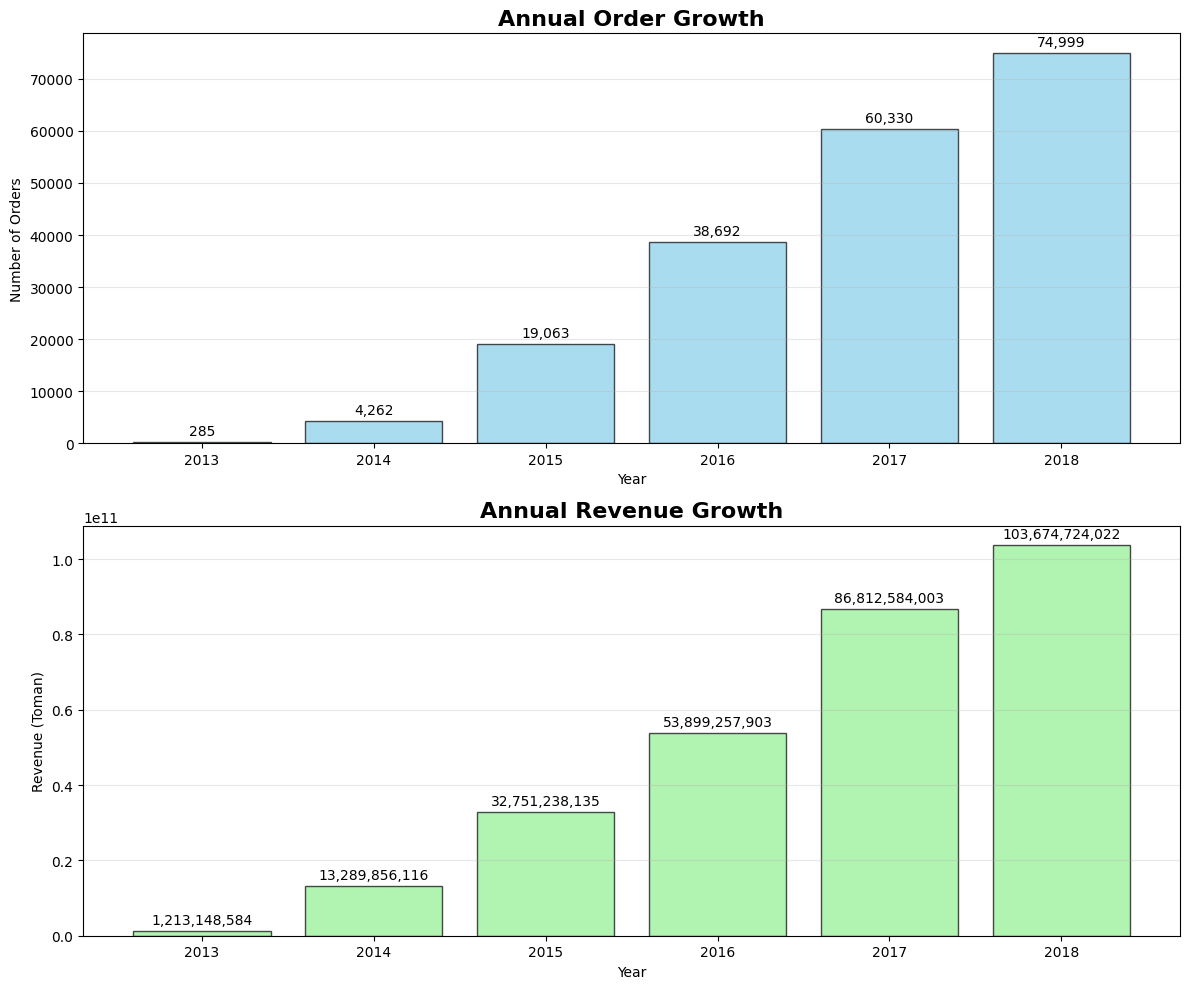

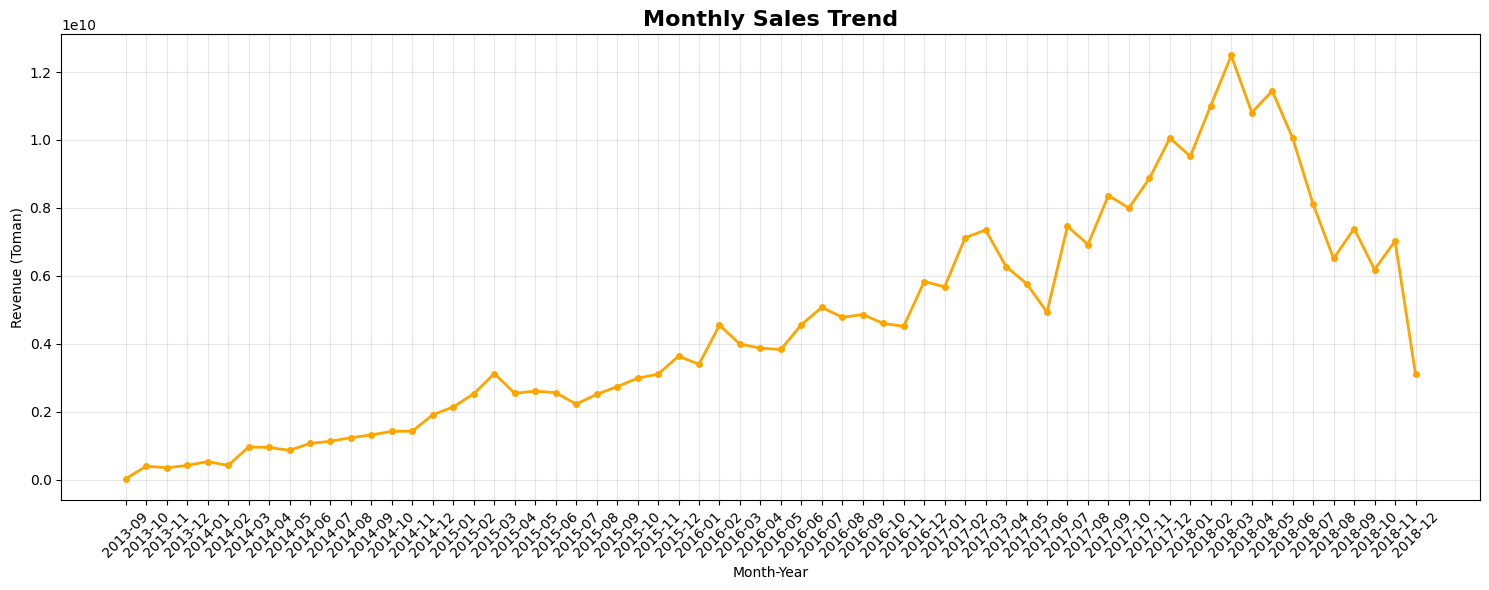

In [28]:
# Annual Sales Analysis
yearly_sales = df.groupby('year').agg(
    total_orders=('ID_Order', 'nunique'),
    total_revenue=('Amount_Gross_Order', 'sum'),
    avg_order_value=('Amount_Gross_Order', 'mean')
).reset_index()

# Monthly Sales Analysis
monthly_sales = df.groupby(['year', 'month', 'month_name']).agg(
    total_orders=('ID_Order', 'nunique'),
    total_revenue=('Amount_Gross_Order', 'sum')
).reset_index()
monthly_sales['month_year'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str).str.zfill(2)

# %%
# Annual Sales Growth Chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Annual Order Count Chart
ax1.bar(yearly_sales['year'].astype(str), yearly_sales['total_orders'], 
        color='skyblue', alpha=0.7, edgecolor='black')
ax1.set_title('Annual Order Growth', fontsize=16, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Orders')
ax1.grid(axis='y', alpha=0.3)

# Add values on top of bars
for i, v in enumerate(yearly_sales['total_orders']):
    ax1.text(i, v + 0.01 * max(yearly_sales['total_orders']), 
             f'{v:,}', ha='center', va='bottom')

# Annual Revenue Chart
ax2.bar(yearly_sales['year'].astype(str), yearly_sales['total_revenue'], 
        color='lightgreen', alpha=0.7, edgecolor='black')
ax2.set_title('Annual Revenue Growth', fontsize=16, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Revenue (Toman)')
ax2.grid(axis='y', alpha=0.3)

# Add values on top of bars
for i, v in enumerate(yearly_sales['total_revenue']):
    ax2.text(i, v + 0.01 * max(yearly_sales['total_revenue']), 
             f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Monthly Sales Trend (Line Chart)
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['month_year'], monthly_sales['total_revenue'], 
         marker='o', linewidth=2, markersize=4, color='orange')
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year')
plt.ylabel('Revenue (Toman)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<div class="note" style="
background-color: #FFF2CC;  /* Ÿæÿ≥‚Äåÿ≤ŸÖ€åŸÜŸá ÿ≤ÿ±ÿØ ŸÖŸÑÿß€åŸÖ */
border-left: 4px solid #E69F00;  /* ÿ≠ÿßÿ¥€åŸá ŸÜÿßÿ±ŸÜÿ¨€å */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>8) ÿ™ÿ≠ŸÑ€åŸÑ ÿßŸÑ⁄ØŸàŸáÿß€å ÿ≥ÿßÿπÿ™€å ŸÅÿ±Ÿàÿ¥ Ÿà ÿØÿ±ÿ¢ŸÖÿØ</h1>

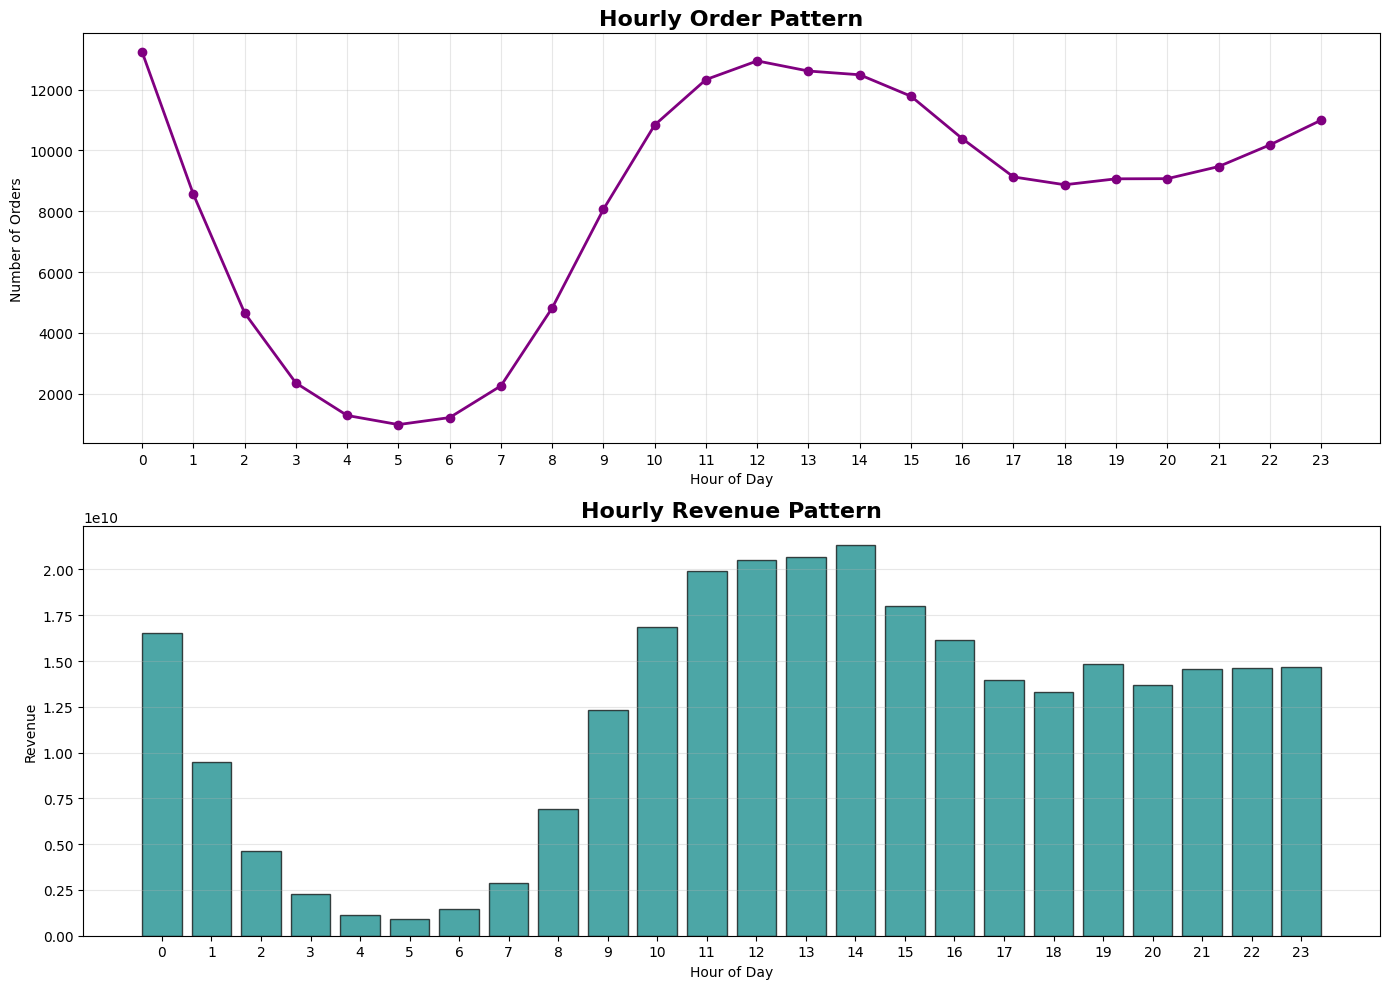

In [29]:
# Hourly Patterns Analysis
hourly_pattern = df.groupby('hour').agg(
    order_count=('ID_Order', 'nunique'),
    total_revenue=('Amount_Gross_Order', 'sum'),
    avg_order_value=('Amount_Gross_Order', 'mean')
).reset_index()

# Daily Patterns Analysis
daily_pattern = df.groupby('day_name').agg(
    order_count=('ID_Order', 'nunique'),
    total_revenue=('Amount_Gross_Order', 'sum'),
    avg_order_value=('Amount_Gross_Order', 'mean')
).reset_index()

# Order of Days in a Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pattern['day_name'] = pd.Categorical(daily_pattern['day_name'], categories=day_order, ordered=True)
daily_pattern = daily_pattern.sort_values('day_name')

# %%
# Hourly Pattern Charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Hourly Order Count
ax1.plot(hourly_pattern['hour'], hourly_pattern['order_count'], 
         marker='o', linewidth=2, markersize=6, color='purple')
ax1.set_title('Hourly Order Pattern', fontsize=16, fontweight='bold')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Orders')
ax1.set_xticks(range(0, 24))
ax1.grid(True, alpha=0.3)

# Hourly Revenue
ax2.bar(hourly_pattern['hour'], hourly_pattern['total_revenue'], 
        color='teal', alpha=0.7, edgecolor='black')
ax2.set_title('Hourly Revenue Pattern', fontsize=16, fontweight='bold')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Revenue')
ax2.set_xticks(range(0, 24))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<div class="note" style="
background-color: #FFF2CC;  /* Ÿæÿ≥‚Äåÿ≤ŸÖ€åŸÜŸá ÿ≤ÿ±ÿØ ŸÖŸÑÿß€åŸÖ */
border-left: 4px solid #E69F00;  /* ÿ≠ÿßÿ¥€åŸá ŸÜÿßÿ±ŸÜÿ¨€å */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>9) ÿ™ÿ≠ŸÑ€åŸÑ ŸÜŸÖŸàÿØÿßÿ±Ÿáÿß€å ŸÅÿ±ŸàŸàÿ¥ Ÿà ÿØÿ±ÿ¢ŸÖÿØ ÿ±Ÿàÿ≤ÿßŸÜŸá</h1>

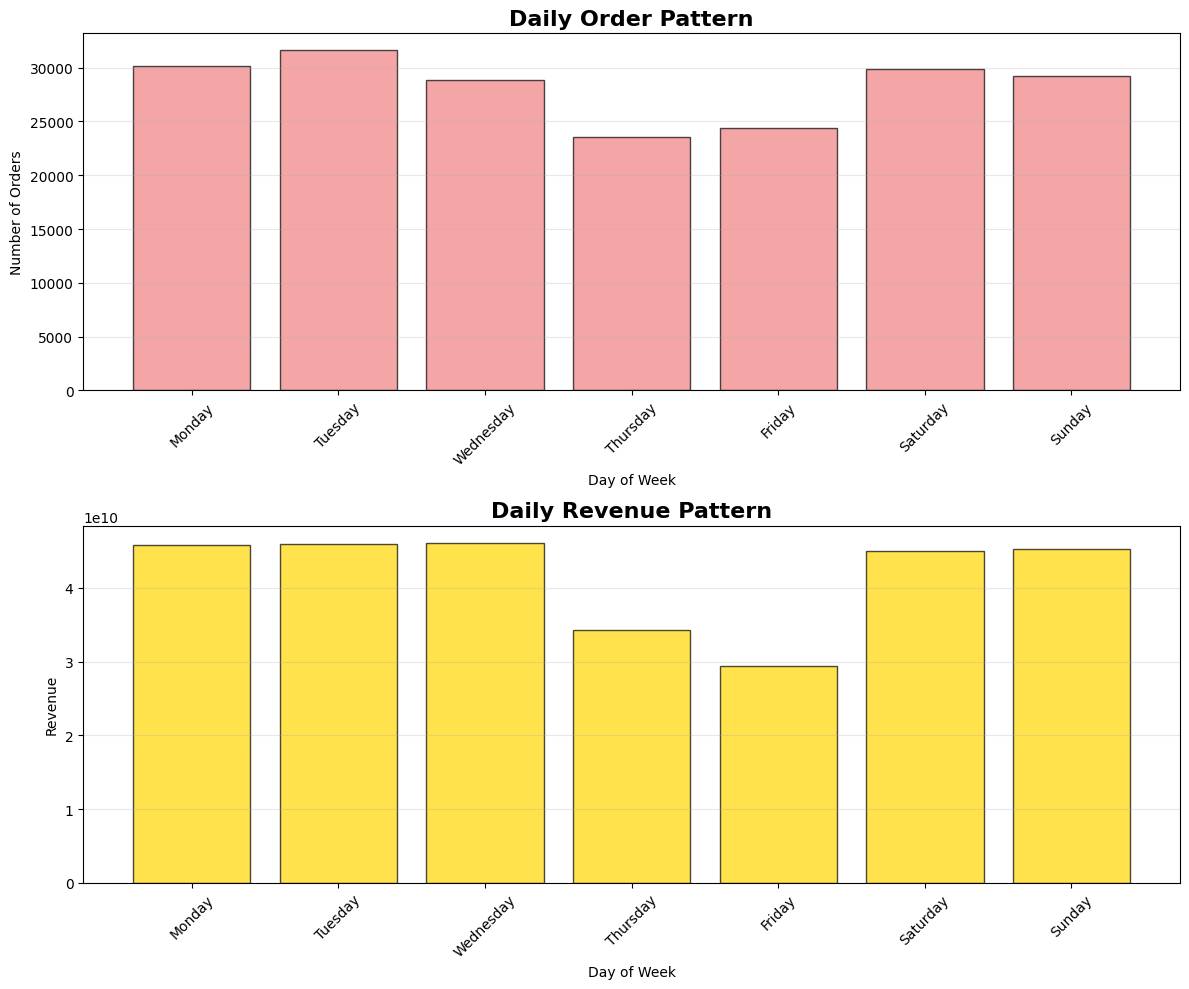

In [30]:
# Daily Pattern Charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Daily Order Count
ax1.bar(daily_pattern['day_name'], daily_pattern['order_count'], 
        color='lightcoral', alpha=0.7, edgecolor='black')
ax1.set_title('Daily Order Pattern', fontsize=16, fontweight='bold')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Number of Orders')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Daily Revenue
ax2.bar(daily_pattern['day_name'], daily_pattern['total_revenue'], 
        color='gold', alpha=0.7, edgecolor='black')
ax2.set_title('Daily Revenue Pattern', fontsize=16, fontweight='bold')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Revenue')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


<div class="note" style="
background-color: #FFF2CC;  /* Ÿæÿ≥‚Äåÿ≤ŸÖ€åŸÜŸá ÿ≤ÿ±ÿØ ŸÖŸÑÿß€åŸÖ */
border-left: 4px solid #E69F00;  /* ÿ≠ÿßÿ¥€åŸá ŸÜÿßÿ±ŸÜÿ¨€å */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>10) ÿ™ÿ≠ŸÑ€åŸÑ ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å</h1>

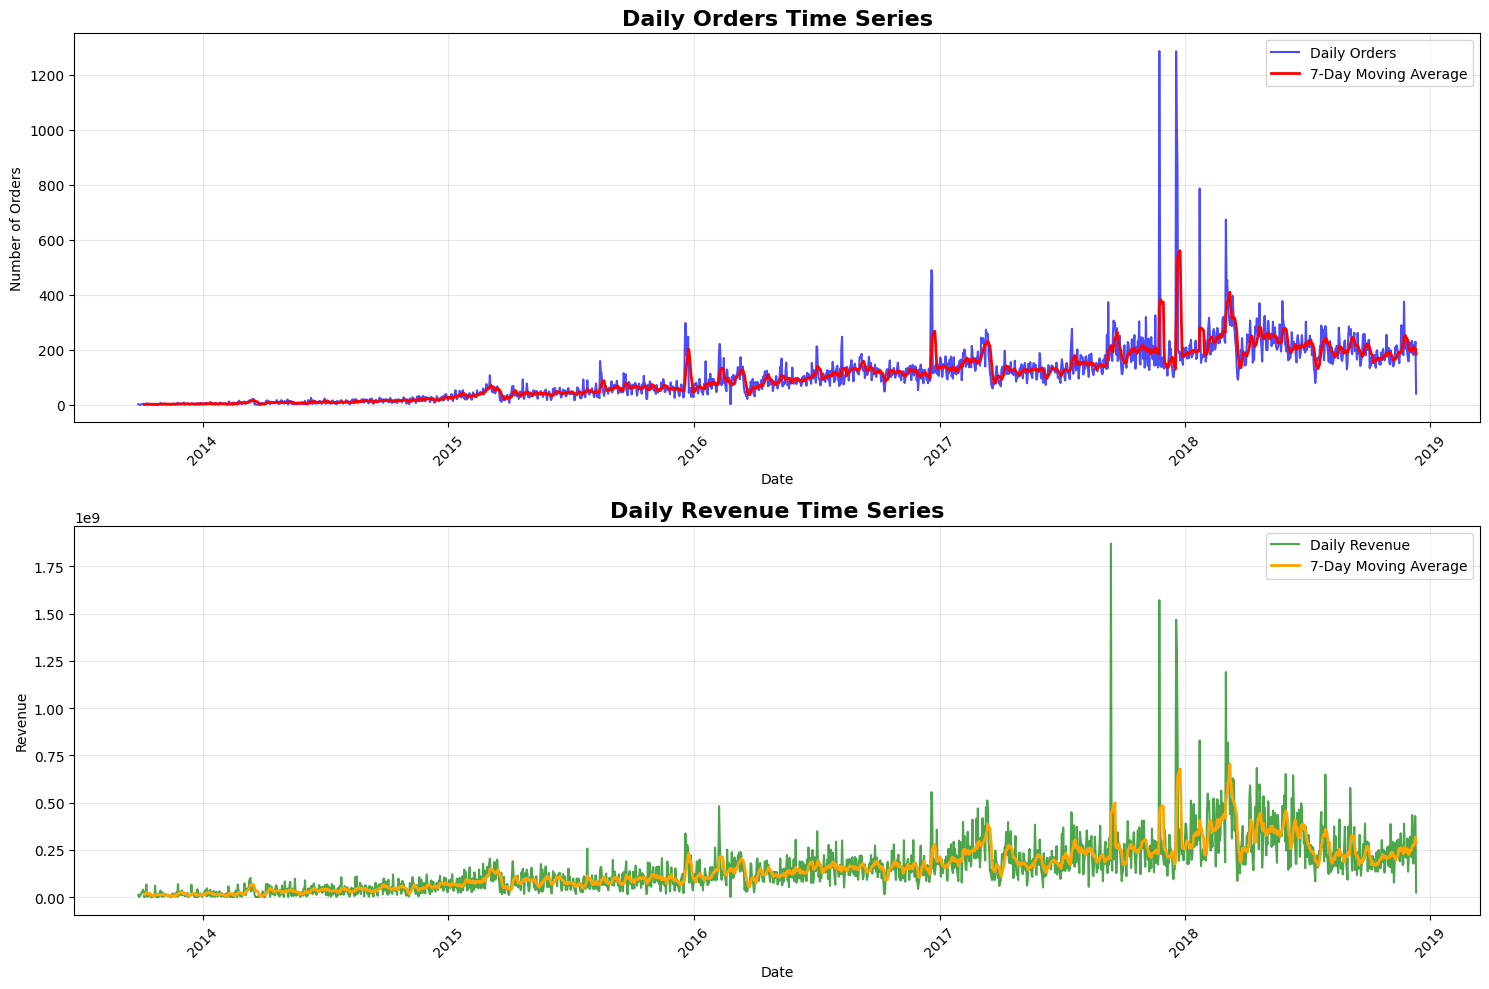

In [31]:
# Create Daily Time Series
daily_time_series = df.groupby('date').agg(
    daily_orders=('ID_Order', 'nunique'),
    daily_revenue=('Amount_Gross_Order', 'sum'),
    avg_daily_order_value=('Amount_Gross_Order', 'mean')
).reset_index()

# Calculate 7-Day Moving Average
daily_time_series['7d_ma_orders'] = daily_time_series['daily_orders'].rolling(window=7).mean()
daily_time_series['7d_ma_revenue'] = daily_time_series['daily_revenue'].rolling(window=7).mean()

# %%
# Time Series Plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Orders Time Series
ax1.plot(daily_time_series['date'], daily_time_series['daily_orders'], 
         label='Daily Orders', alpha=0.7, color='blue')
ax1.plot(daily_time_series['date'], daily_time_series['7d_ma_orders'], 
         label='7-Day Moving Average', linewidth=2, color='red')
ax1.set_title('Daily Orders Time Series', fontsize=16, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Orders')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Revenue Time Series
ax2.plot(daily_time_series['date'], daily_time_series['daily_revenue'], 
         label='Daily Revenue', alpha=0.7, color='green')
ax2.plot(daily_time_series['date'], daily_time_series['7d_ma_revenue'], 
         label='7-Day Moving Average', linewidth=2, color='orange')
ax2.set_title('Daily Revenue Time Series', fontsize=16, fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Revenue')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<div class="note" style="
background-color: #FFF2CC;  /* Ÿæÿ≥‚Äåÿ≤ŸÖ€åŸÜŸá ÿ≤ÿ±ÿØ ŸÖŸÑÿß€åŸÖ */
border-left: 4px solid #E69F00;  /* ÿ≠ÿßÿ¥€åŸá ŸÜÿßÿ±ŸÜÿ¨€å */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>11) ÿ™ÿ≠ŸÑ€åŸÑ ÿ¨ÿ∫ÿ±ÿßŸÅ€åÿß€å€å</h1>

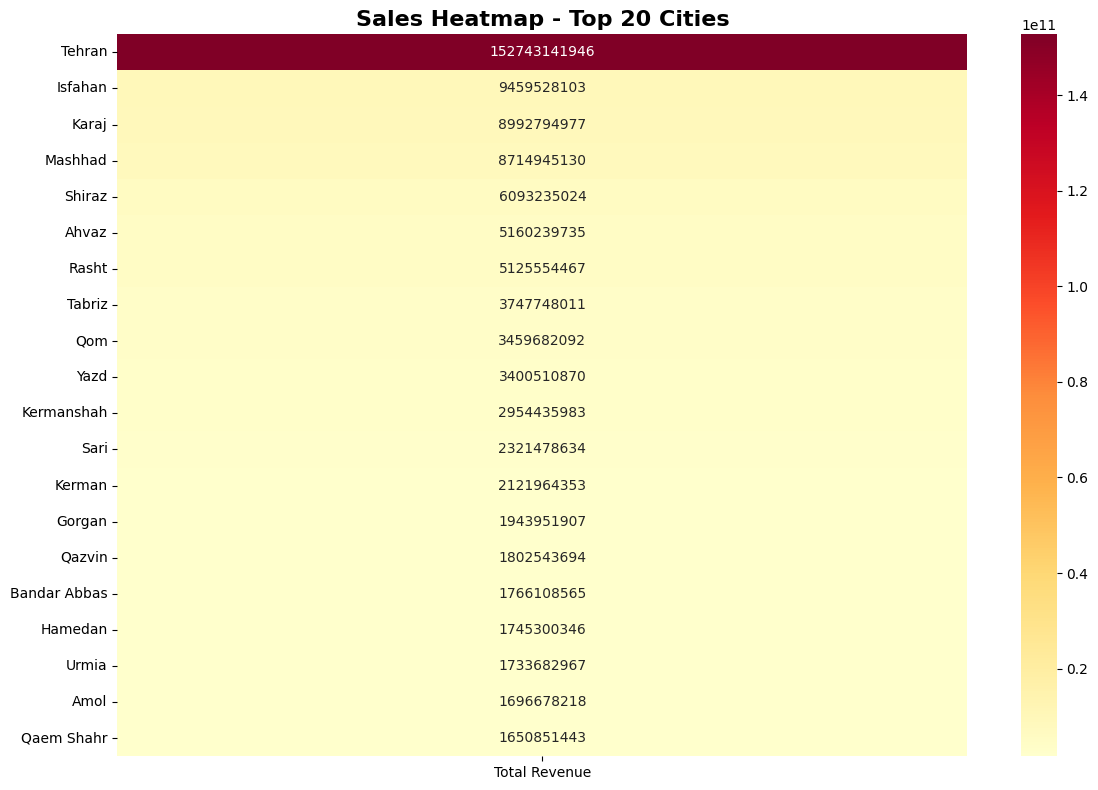

In [ ]:
# ÿØ€å⁄©ÿ¥ŸÜÿ±€å ÿ™ÿ®ÿØ€åŸÑ ÿ¥Ÿáÿ±Ÿáÿß ÿßÿ≤ ŸÅÿßÿ±ÿ≥€å ÿ®Ÿá ÿßŸÜ⁄ØŸÑ€åÿ≥€å
fa_to_en = {
    'ŸÖÿ≠ŸÖŸàÿØ ÿ¢ÿ®ÿßÿØ': 'Mahmoudabad',
    'ÿÆÿ±ŸÖÿØÿ±Ÿá': 'Khorramdarreh',
    'ŸÇÿ±⁄Ü⁄©': 'Qarchak',
    'ŸÇŸÖ': 'Qom',
    'ÿ™Ÿáÿ±ÿßŸÜ': 'Tehran',
    'ŸÖÿ¥ŸáÿØ': 'Mashhad',
    'ÿßÿµŸÅŸáÿßŸÜ': 'Isfahan',
    'ÿ±ÿ¥ÿ™': 'Rasht',
    'ÿÆÿ±ŸÖÿ¥Ÿáÿ±': 'Khorramshahr',
    'ŸÑÿßŸÑ€å': 'Lali',
    'ÿ™ŸÜ⁄©ÿßÿ®ŸÜ': 'Tonekabon',
    '⁄©ÿ±ÿ¨': 'Karaj',
    'ÿßŸáŸàÿßÿ≤': 'Ahvaz',
    'ÿ¥ÿßŸá€åŸÜ ÿ¥Ÿáÿ±': 'Shahin Shahr',
    'ÿ≤ŸÜÿ¨ÿßŸÜ': 'Zanjan',
    'ÿ≥ÿßÿ±€å': 'Sari',
    '⁄©ŸÑŸàÿ±': 'Kelur',
    'Ÿá⁄Ü€åÿ±ŸàÿØ': 'Hachirood',
    'ŸÖÿ®ÿßÿ±⁄©Ÿá': 'Mobarakeh',
    'ÿ¢ÿ®ÿßÿØÿßŸÜ': 'Abadan',
    '⁄©€åÿ¥': 'Kish',
    'ÿ®ŸÜÿØÿ± ÿßŸÜÿ≤ŸÑ€å': 'Bandar Anzali',
    'ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ': 'Borujerd',
    'ŸÇÿßÿ¶ŸÖ ÿ¥Ÿáÿ±': 'Qaem Shahr',
    'ÿ¢ÿ≥ÿ™ÿßŸÜŸá ÿßÿ¥ÿ±ŸÅ€åŸá': 'Astaneh Ashrafieh',
    'ÿ¥€åÿ±ÿßÿ≤': 'Shiraz',
    'ÿ¢ŸÖŸÑ': 'Amol',
    '⁄©ÿ±ŸÖÿßŸÜÿ¥ÿßŸá': 'Kermanshah',
    'ÿ®Ÿàÿ¥Ÿáÿ±': 'Bushehr',
    'ŸÇÿ≤Ÿà€åŸÜ': 'Qazvin',
    'ÿ®ŸÜÿØÿ± ÿπÿ®ÿßÿ≥': 'Bandar Abbas',
    'ŸÜ€åÿ¥ÿßÿ®Ÿàÿ±': 'Neyshabur',
    'ÿ™ÿ®ÿ±€åÿ≤': 'Tabriz',
    'ÿßÿ±ÿß⁄©': 'Arak',
    'ÿß€åŸÑÿßŸÖ': 'Ilam',
    'ŸÑÿßŸá€åÿ¨ÿßŸÜ': 'Lahijan',
    'ÿπŸÑ€å ÿ¢ÿ®ÿßÿØ': 'Aliabad',
    '€åÿ≤ÿØ': 'Yazd',
    'ÿ≤ÿßÿ®ŸÑ': 'Zabol',
    'ÿ¥Ÿáÿ±⁄©ÿ±ÿØ': 'Shahrekord',
    'ÿ±Ÿà€åÿØÿ±': 'Ruydar',
    '⁄©ÿ®ŸàÿØÿ± ÿ¢ŸáŸÜ⁄Ø': 'Kabudarahang',
    'ÿ™ÿß⁄©ÿ≥ÿ™ÿßŸÜ': 'Takestan',
    'Ÿáÿ¥ÿ™⁄Øÿ±ÿØ': 'Hashtgerd',
    '⁄Øÿ±⁄ØÿßŸÜ': 'Gorgan',
    'ÿÆŸÖÿßŸÖ': 'Khomam',
    'Ÿàÿ±ÿ≤ŸÜŸá': 'Varzaneh',
    '⁄ØŸÜÿ®ÿØ⁄©ÿßŸàŸàÿ≥': 'Gonbad-e Kavus',
    'ŸáŸÖÿØÿßŸÜ': 'Hamedan',
    'ÿ≤ÿ±ŸÜÿØ': 'Zarand',
    'ŸÜŸàÿ¥Ÿáÿ±': 'Nowshahr',
    'ŸáÿßÿØ€åÿ¥Ÿáÿ±': 'Hadishahr',
    'ÿ¥Ÿáÿ±€åÿßÿ±': 'Shahriar',
    'ŸÅŸÑÿßŸàÿ±ÿ¨ÿßŸÜ': 'Falavarjan',
    '⁄©ÿßÿ≤ÿ±ŸàŸÜ': 'Kazerun',
    'ÿØ€åŸàÿßŸÜÿØÿ±Ÿá': 'Divandarreh',
    'ÿÆŸÖ€åŸÜ': 'Khomein',
    'ÿµÿ∫ÿßÿØ': 'Saghad',
    'ÿ¥Ÿáÿ± ÿ¨ÿØ€åÿØ ÿµÿØÿ±ÿß': 'Shahr-e Jadid-e Sadra',
    '⁄©ÿ±ŸÖÿßŸÜ': 'Kerman',
    'ÿ®€åÿ±ÿ¨ŸÜÿØ': 'Birjand',
    'ÿ¢ÿ≥ÿ™ÿßÿ±ÿß': 'Astara',
    'ÿßÿ±ÿØÿ®€åŸÑ': 'Ardabil',
    'ÿØÿ≤ŸÅŸàŸÑ': 'Dezful',
    'ŸÜÿ¨ŸÅ ÿ¢ÿ®ÿßÿØ': 'Najafabad',
    'ÿØŸàÿ±ŸàÿØ': 'Dorud',
    'ÿ≥ŸÖŸÜÿßŸÜ': 'Semnan',
    'ÿ≥ÿßŸàŸá': 'Saveh',
    'ÿÆÿ±ŸÖ ÿ¢ÿ®ÿßÿØ': 'Khorramabad',
    'ÿ≥ÿ±ÿ®€åÿ¥Ÿá': 'Sarbisheh',
    'ÿ≥ÿ®ÿ≤Ÿàÿßÿ±': 'Sabzevar',
    'ÿ≥€åÿßŸá⁄©ŸÑ': 'Siahkal',
    'ŸÅŸàŸÖŸÜ': 'Fuman',
    'ÿßÿ≥ŸÑÿßŸÖ ÿ¢ÿ®ÿßÿØ ÿ∫ÿ±ÿ®': 'Eslamabad-e Gharb',
    'ÿßÿ≥ŸÑÿßŸÖÿ¥Ÿáÿ±': 'Eslamshahr',
    'ÿ≥ÿ±ÿØÿ¥ÿ™': 'Sardasht',
    'ÿ¨€åÿ±ŸÅÿ™': 'Jiroft',
    'ŸÅÿ±ÿØ€åÿ≥': 'Fardis',
    'ÿ¥ÿ®ÿ≥ÿ™ÿ±': 'Shabestar',
    'ŸÑŸÜ⁄Øÿ±ŸàÿØ': 'Langarud',
    '⁄Øÿ±ŸÖÿØÿ±Ÿá': 'Garmdareh',
    'ÿ∑ÿ±ŸÇÿ®Ÿá': 'Torghabeh',
    'ÿ¥Ÿàÿ¥': 'Shush',
    'ÿ¢ÿ¥ÿÆÿßŸÜŸá': 'Ashkhaneh',
    'ÿßÿ±ÿ≤Ÿàÿ¶€åŸá': 'Orzueeyeh',
    'ŸÖ€åÿßŸÜÿØŸàÿ¢ÿ®': 'Miandoab',
    'ÿßŸÑ€å⁄ØŸàÿØÿ±ÿ≤': 'Aligudarz',
    'ÿ™ÿ±ÿ®ÿ™ ÿ¨ÿßŸÖ': 'Torbat-e Jam',
    '⁄©ŸàŸáÿØÿ¥ÿ™': 'Kuhdasht',
    '€åÿßÿ≥Ÿàÿ¨': 'Yasuj',
    'ÿ®ÿ≥ÿ™⁄©': 'Bastak',
    'ÿØÿ±⁄ØŸáÿßŸÜ': 'Dargahan',
    'ÿ™Ÿà€åÿ≥ÿ±⁄©ÿßŸÜ': 'Tuyserkan',
    'ÿ≤ÿßŸáÿØÿßŸÜ': 'Zahedan',
    'ÿßÿ±ŸàŸÖ€åŸá': 'Urmia',
    'ÿ™ŸÅÿ™': 'Taft',
    '⁄ØŸÑŸæÿß€å⁄ØÿßŸÜ': 'Golpayegan',
    'ŸÑÿßÿ±': 'Lar',
    'ÿ®Ÿáÿ®ŸáÿßŸÜ': 'Behbahan',
    # ÿ®ŸÇ€åŸá ÿ¥Ÿáÿ±Ÿáÿß ÿ±ÿß ŸÖ€å‚Äåÿ™ŸàÿßŸÜ ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØ
}

# ÿß€åÿ¨ÿßÿØ ÿ≥ÿ™ŸàŸÜ ÿßŸÜ⁄ØŸÑ€åÿ≥€å
df['city_name_en'] = df['city_name_fa_cleaned'].map(fa_to_en)

# ÿ™ÿ≠ŸÑ€åŸÑ ÿ¨ÿ∫ÿ±ÿßŸÅ€åÿß€å€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÜÿßŸÖ ÿßŸÜ⁄ØŸÑ€åÿ≥€å
city_analysis = df.groupby('city_name_en').agg(
    total_orders=('ID_Order', 'nunique'),
    total_revenue=('Amount_Gross_Order', 'sum'),
    avg_order_value=('Amount_Gross_Order', 'mean'),
    unique_customers=('ID_Customer', 'nunique')
).reset_index()

# ŸÅ€åŸÑÿ™ÿ± ÿ¥Ÿáÿ±Ÿáÿß€å ÿ®ÿß ÿ≠ÿØÿßŸÇŸÑ €±€∞ ÿ≥ŸÅÿßÿ±ÿ¥
city_analysis = city_analysis[city_analysis['total_orders'] >= 10].sort_values('total_revenue', ascending=False)

# %%
# ŸÜŸÇÿ¥Ÿá ÿ≠ÿ±ÿßÿ±ÿ™€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿØÿ±ÿ¢ŸÖÿØ
plt.figure(figsize=(12, 8))
heatmap_data = city_analysis.head(20).set_index('city_name_en')['total_revenue']
sns.heatmap(heatmap_data.values.reshape(-1, 1), 
            annot=True, fmt='.0f', 
            cmap='YlOrRd', 
            xticklabels=['Total Revenue'],
            yticklabels=heatmap_data.index)
plt.title('Sales Heatmap - Top 20 Cities', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ŸÜŸÖŸàÿØÿßÿ± Bubble (ÿßŸÜÿØÿßÿ≤Ÿá = ÿØÿ±ÿ¢ŸÖÿØÿå ÿ±ŸÜ⁄Ø = ÿßÿ±ÿ≤ÿ¥ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ≥ŸÅÿßÿ±ÿ¥)
plt.figure(figsize=(14, 8))
scatter = plt.scatter(city_analysis.head(15)['total_orders'], 
                     city_analysis.head(15)['avg_order_value'],
                     s=city_analysis.head(15)['total_revenue']/10000,  # bubble size
                     alpha=0.6, 
                     c=city_analysis.head(15)['total_revenue'],
                     cmap='viridis')

plt.colorbar(scatter, label='Total Revenue')
plt.title('City Analysis: Number of Orders vs Average Order Value', fontsize=16, fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Average Order Value')
plt.grid(True, alpha=0.3)

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ŸÜÿßŸÖ ÿ¥Ÿáÿ±Ÿáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø ÿ≥ŸÅ€åÿØ ÿ®ÿ±ÿß€å ÿ™ÿ∂ÿßÿØ ÿ®€åÿ¥ÿ™ÿ±
for i, row in city_analysis.head(15).iterrows():
    plt.annotate(
        row['city_name_en'], 
        (row['total_orders'], row['avg_order_value']),
        xytext=(0, 5),  # ÿ¨ÿßÿ®ÿ¨ÿß€å€å ÿπŸÖŸàÿØ€å ŸÖÿ™ŸÜ ŸÜÿ≥ÿ®ÿ™ ÿ®Ÿá ŸÖÿ±⁄©ÿ≤ ÿ≠ÿ®ÿßÿ®
        textcoords='offset points',
        ha='center',    # Ÿàÿ≥ÿ∑ ⁄Ü€åŸÜ ⁄©ÿ±ÿØŸÜ ŸÖÿ™ŸÜ
        fontsize=9, 
        color='white',  # ÿ±ŸÜ⁄Ø ŸÖÿ™ŸÜ ŸÖÿÆÿßŸÑŸÅ ÿ®ÿß ÿß⁄©ÿ´ÿ± ÿ±ŸÜ⁄Ø‚ÄåŸáÿß€å cmap
        weight='bold'
    )

plt.tight_layout()
plt.show()


<div class="note" style="
background-color: #FFF2CC;  /* Ÿæÿ≥‚Äåÿ≤ŸÖ€åŸÜŸá ÿ≤ÿ±ÿØ ŸÖŸÑÿß€åŸÖ */
border-left: 4px solid #E69F00;  /* ÿ≠ÿßÿ¥€åŸá ŸÜÿßÿ±ŸÜÿ¨€å */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>12) ÿ¥ŸÜÿßÿ≥ÿß€å€å ÿßŸàÿ¨ ÿÆÿ±€åÿØ </h1>

In [ ]:
# Peak Purchase Analysis
peak_hours = hourly_pattern.nlargest(5, 'order_count')
peak_days = daily_pattern.nlargest(3, 'order_count')

total_orders = len(df)
peak_hours_share = peak_hours['order_count'].sum() / total_orders * 100
peak_days_share = peak_days['order_count'].sum() / total_orders * 100

# Display Peak Purchase Times
print("=" * 60)
print("üìä Peak Purchase Analysis")
print("=" * 60)

# Peak Hours
print("\nTop 5 Peak Hours (by number of orders):")
for i, row in peak_hours.iterrows():
    hour = row['hour']
    count = row['order_count']
    percent = count / total_orders * 100
    print(f"  - {hour}:00 ‚Üí {count:,} orders ({percent:.1f}% of total orders)")

print(f"  ‚Üí Combined share of top 5 hours: {peak_hours_share:.1f}%\n")

# Peak Days
print("Top 3 Peak Days (by number of orders):")
for i, row in peak_days.iterrows():
    day = row['day_name']
    count = row['order_count']
    percent = count / total_orders * 100
    print(f"  - {day} ‚Üí {count:,} orders ({percent:.1f}% of total orders)")

print(f"  ‚Üí Combined share of top 3 days: {peak_days_share:.1f}%\n")

# Peak Hour-Day Combinations
hour_day_analysis = df.groupby(['day_name', 'hour']).agg(
    order_count=('ID_Order', 'nunique')
).reset_index()

peak_hour_day = hour_day_analysis.nlargest(5, 'order_count')
print("Top 5 Peak Day-Hour Combinations:")
for i, row in peak_hour_day.iterrows():
    day = row['day_name']
    hour = row['hour']
    count = row['order_count']
    print(f"  - {day} at {hour}:00 ‚Üí {count:,} orders")


<div class="note" style="
background-color: #FFF2CC;  /* Ÿæÿ≥‚Äåÿ≤ŸÖ€åŸÜŸá ÿ≤ÿ±ÿØ ŸÖŸÑÿß€åŸÖ */
border-left: 4px solid #E69F00;  /* ÿ≠ÿßÿ¥€åŸá ŸÜÿßÿ±ŸÜÿ¨€å */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>13) ÿ™ÿ≠ŸÑ€åŸÑ ÿπŸÑŸë€å ÿπŸàÿßŸÖŸÑ ŸÖŸàÿ´ÿ± ÿ®ÿ± ŸÅÿ±Ÿàÿ¥</h1>

In [ ]:
# Correlation Analysis
correlation_analysis = df[['Amount_Gross_Order', 'Quantity_item', 'hour', 'day']].corr()

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_analysis, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Sales Factors', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# %%
# Detailed Factor Analysis
print(" Causal Analysis of Factors Affecting Sales")
print("=" * 60)

# Effect of item quantity on order value
corr_quantity_amount = correlation_analysis.loc['Quantity_item', 'Amount_Gross_Order']
print(f"1.  Correlation between Quantity per Order and Order Value: {corr_quantity_amount:.3f}")

# Effect of hour on order value
corr_hour_amount = correlation_analysis.loc['hour', 'Amount_Gross_Order']
print(f"2.  Correlation between Hour of Day and Order Value: {corr_hour_amount:.3f}")

# Weekend vs Weekday orders
weekend_orders = df[df['day_name'].isin(['Friday', 'Saturday'])]
weekday_orders = df[~df['day_name'].isin(['Friday', 'Saturday'])]

weekend_avg = weekend_orders['Amount_Gross_Order'].mean()
weekday_avg = weekday_orders['Amount_Gross_Order'].mean()
weekend_diff = ((weekend_avg - weekday_avg) / weekday_avg) * 100

print(f"3.  Weekend vs Weekday Order Value Difference: {weekend_diff:+.1f}%")

# Evening vs Daytime orders
evening_orders = df[df['hour'].between(18, 23)]
daytime_orders = df[df['hour'].between(9, 17)]

evening_avg = evening_orders['Amount_Gross_Order'].mean()
daytime_avg = daytime_orders['Amount_Gross_Order'].mean()
evening_diff = ((evening_avg - daytime_avg) / daytime_avg) * 100

print(f"4.  Evening (18-23) vs Daytime (9-17) Order Value Difference: {evening_diff:+.1f}%")

print("=" * 60)

# Save analyzed data
df.to_csv('order_analyzed.csv', index=False, encoding='utf-8-sig')
print(" Analyzed data has been saved to 'order_analyzed.csv'.")

# Final Summary
print("\n Exploratory Data Analysis completed successfully!")
print(" Key insights have been extracted and data is ready for modeling.")
